In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler

In [8]:
cd CardiovascularDiseaseDetection/

/home/sk-ji/Cont_ent/FlipNwork/NLP August Assignment/CardiovascularDiseaseDetection


In [9]:
df = pd.read_csv('cardio_train.csv',sep=";")

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


# <font color=teal >EDA: </font>
- <font color=orangered> **Shape of data is** `(69301, 13)` </font>
- <font color=orangered>**There is no null values** 
- <font color=orangered>**There is only `Wieght` in `float`<br> rest all the feature in `int`**  
- <font color=orangered>**`Age` is in days, need to convert in years**
- <font color=orangered>**There are two types of blood pressure given i.e. `ap_in` & `ap_lo`**
- <font color=orangered>**In Statistical Analysis [`df.describe()`] it can be seen that both the minimum value of `ap_hi` and `ap_lo`are in negative which is impossible**
- <font color=orangered>**Our Target Variable is balaced as there are `31749` and `31489` counts in respective neg and positve presence of disease**     

In [11]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


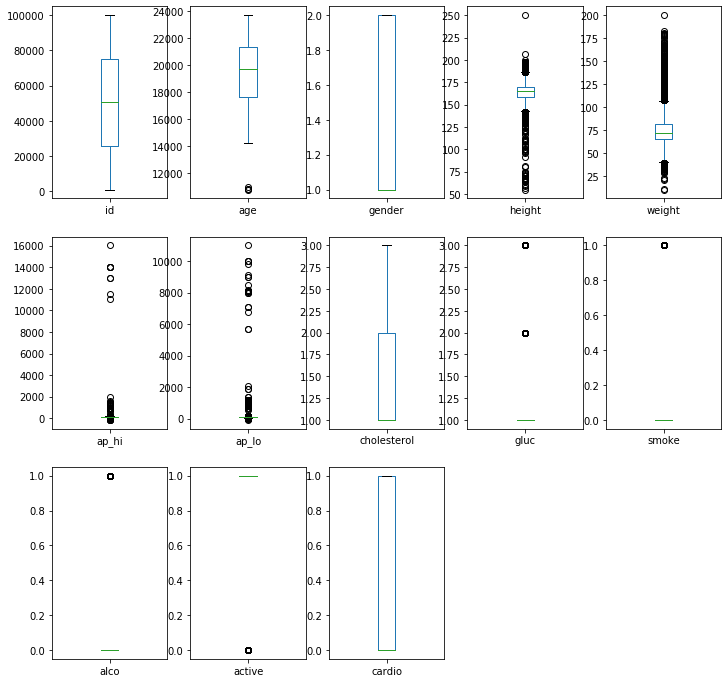

In [12]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12))
plt.show()

### Dropping Outliers for `ap_hi` and `ap_lo`

In [13]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

### Converting `Age` in days to `Age` in years 

In [14]:
df['age'] = (df['age'] / 365).round().astype('int')

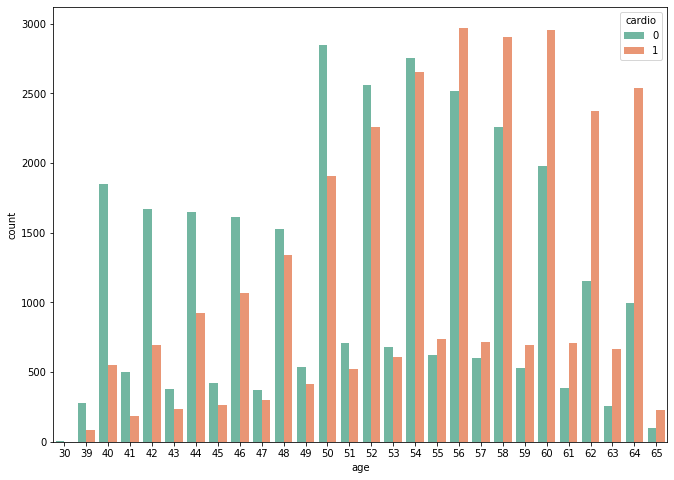

In [15]:
fig, ax = plt.subplots(figsize=(11,8))
sns.countplot(x='age', hue='cardio', data = df, palette="Set2")

####                                           
- **after the age of 50 the dise3ase count increased** <br><br><br>

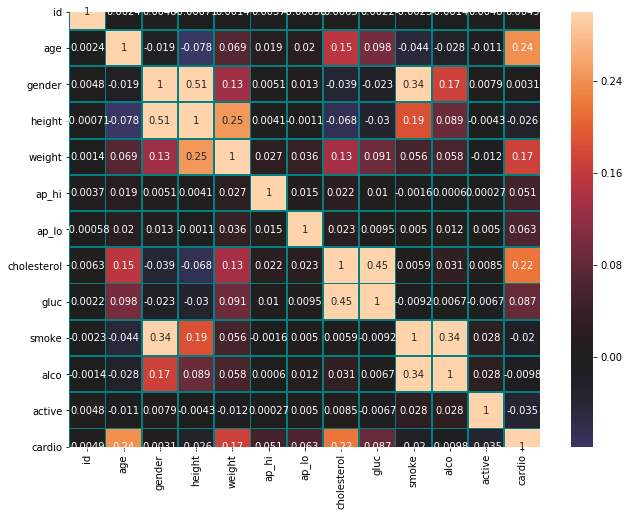

In [16]:
fig, ax = plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), vmax=.3, center=0,annot = True, linewidths=.8,square=True,linecolor='teal')

In [17]:
df.drop('id', inplace =True,axis=1)

### Feature Engineering by adding `BMI` column

In [18]:
df['BMI'] = df['weight']/((df['height']/100)**2)

### Checking Distribution for Scaling or Normalization

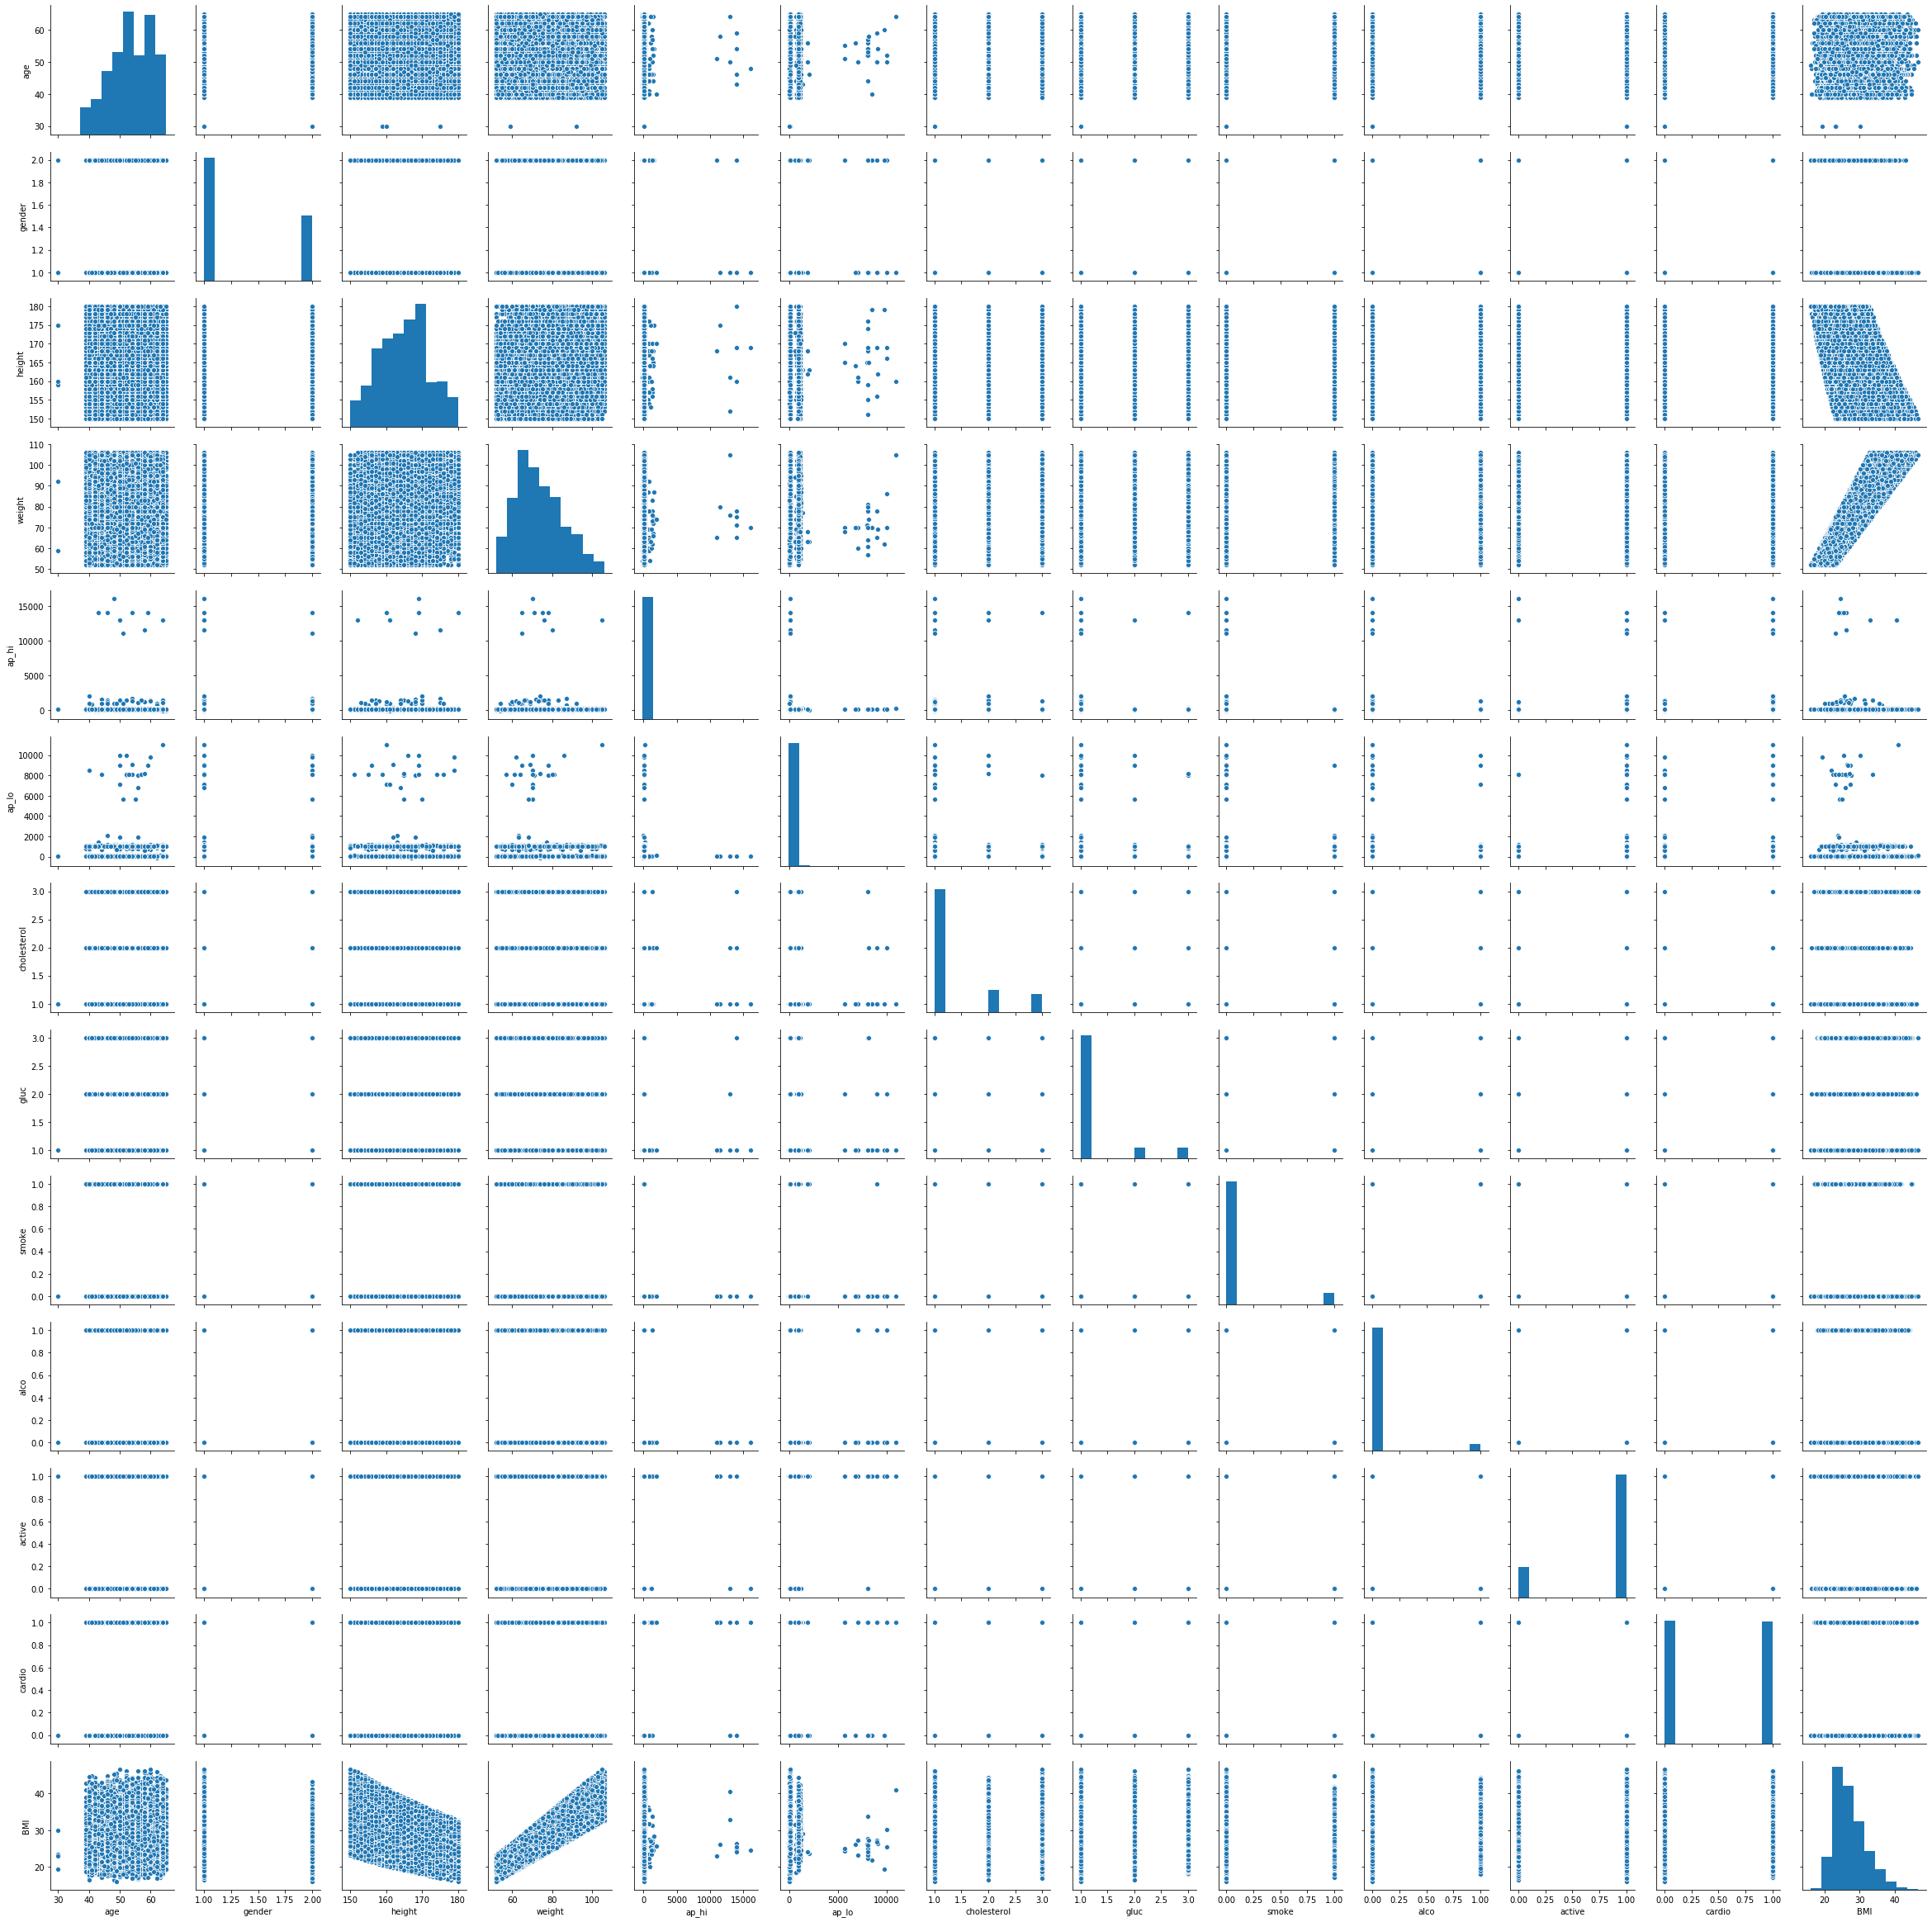

In [19]:
sns.pairplot(df)

age


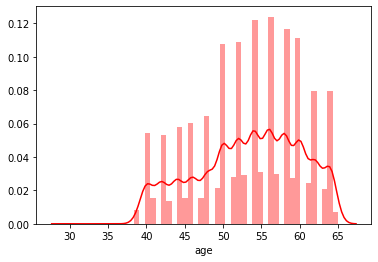

gender


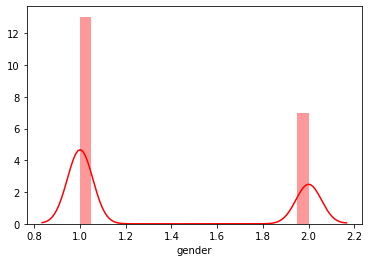

height


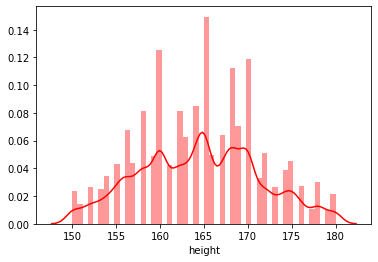

weight


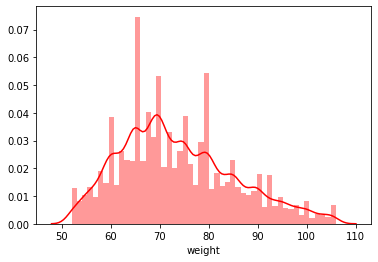

ap_hi


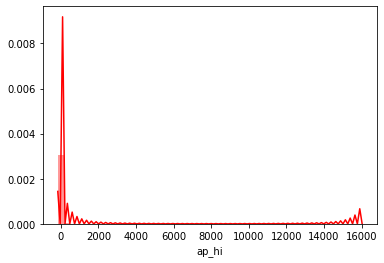

ap_lo


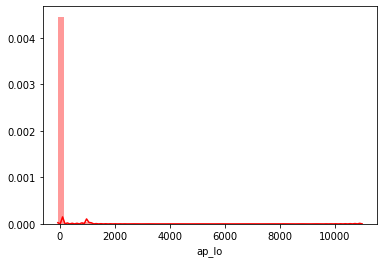

cholesterol


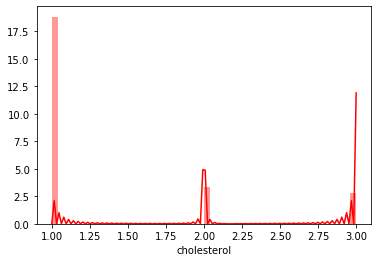

gluc


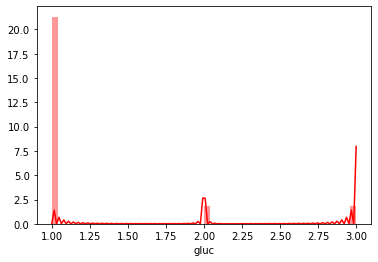

smoke


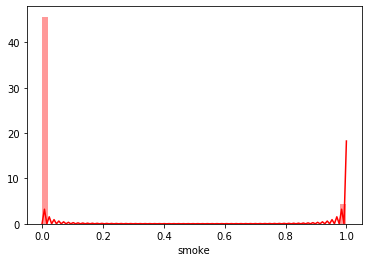

alco


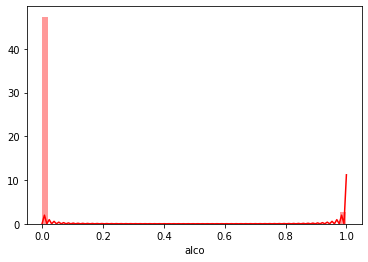

active


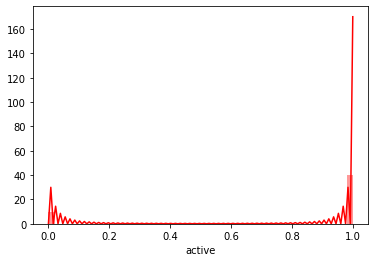

cardio


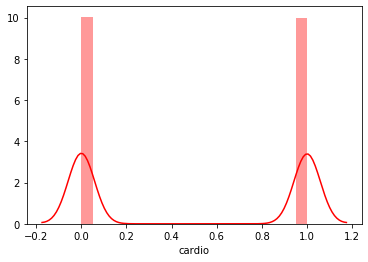

BMI


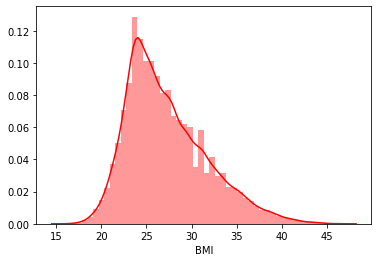

In [20]:
for i in df.columns:
    print(i)
#     x = pd.Series(df[i])
    ax = sns.distplot(df[i],color='r')
    plt.show()
#     print(ax)


- Most of the features are Normally Distributed hence we can use both normalization and standarization <br> Normalization will be used
- we can drop outliers but since most of the data is near to normally distributed as we are leaving for now<br><br><br><br>

## Normalization and Modelling

In [23]:
X.shape

(63238, 12)

In [24]:
y.shape

(63238, 1)

In [22]:
X = df.drop(columns='cardio')
y = df[['cardio']]

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB


In [26]:
sgd = SGDClassifier(n_jobs = -1, random_state= 42, max_iter=200)
lgr = LogisticRegression(random_state = 42,max_iter=200)
lgrcv = LogisticRegressionCV(random_state= 42, cv=5, max_iter=1000)
svm = LinearSVC(random_state=42,max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=30)
naive = MultinomialNB(alpha=0.5)

In [39]:
clf1 = {'SGD': sgd, 'LGR': lgr, 'LGRCV': lgrcv, 'SVM':svm, 'RFC':rfc, 'NAIVE':naive }

In [40]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGRCV': lgrcv, 'SVM':svm, 'RFC':rfc}

In [28]:
results = pd.DataFrame(columns=['model','Accuracy Score'])
model_name = ['SGD', 'LGR', 'LGRCV', 'SVM', 'RFC', 'NAIVE']
def classify (X,y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42, stratify= y)
    
    for idx,key in enumerate(clf.keys()):
        clf[key].fit(X_train,y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test,y_pred)
#         print(key,"---> ",ac)
        results.loc[idx] = [model_name[idx],ac]
    print(results)


In [29]:
classify(X,y)

/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y 

   model  Accuracy Score
0    SGD        0.642868
1    LGR        0.645478
2  LGRCV        0.715133
3    SVM        0.648324
4    RFC        0.698450
5  NAIVE        0.589263


/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### We'll try Cross Validation Method for achieving higher accuracy

In [35]:
df[df < 0] = 0

In [33]:
results = pd.DataFrame(columns=['model','Accuracy Score','CV_score'])
models_name = ['SGD', 'LGR', 'LGRCV', 'SVM', 'RFC']

In [31]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score


In [41]:
kfold = KFold(n_splits=5,shuffle=True,random_state=100)

for idx,key in enumerate(clf.keys()):
    CV_score=cross_val_score(clf[key],X,y,scoring='accuracy',cv=kfold,n_jobs=-1,verbose=1)
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.15)
    clf[key].fit(X,y)
    y_pred = clf[key].predict(x_test)
    ac = accuracy_score(y_test,y_pred)
    results.loc[idx] = [models_name[idx],ac,CV_score]

results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

,model,Accuracy Score,CV_score
0,SGD,0.533945,"[0.7041429475015812, 0.5804079696394687, 0.577..."
1,LGR,0.721906,"[0.7180581910183428, 0.7207463630613535, 0.721..."
2,LGRCV,0.720957,"[0.7193232131562303, 0.722011385199241, 0.7213..."
3,SVM,0.506747,"[0.7213788741302973, 0.5898165717900063, 0.510..."
4,RFC,0.966899,"[0.6959203036053131, 0.7024826059456041, 0.707..."


In [45]:
for i in df.columns:
    s = pd.Series(df[i].values)
    print(any(s<0))

False
False
False
False
False
False
False
False
False
False
False
False
False


In [48]:
results

,model,Accuracy Score,CV_score
0,SGD,0.533945,"[0.7041429475015812, 0.5804079696394687, 0.5774826059456041, 0.5616351703961414, 0.6117656361192377]"
1,LGR,0.721906,"[0.7180581910183428, 0.7207463630613535, 0.7210626185958254, 0.7170079860836562, 0.7106823752668617]"
2,LGRCV,0.720957,"[0.7193232131562303, 0.722011385199241, 0.7213788741302973, 0.7158219340555072, 0.7121056377006405]"
3,SVM,0.506747,"[0.7213788741302973, 0.5898165717900063, 0.5105154965211891, 0.5142721594053926, 0.5377559895627422]"
4,RFC,0.966899,"[0.6959203036053131, 0.7024826059456041, 0.7078589500316256, 0.6984265043093224, 0.7004823278247806]"


In [47]:
pd.options.display.max_colwidth = 1000


In [52]:
# from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
# rf = RandomForestClassifier()

parameters = { 'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}

random_grid = GridSearchCV(rfc, parameters, cv = 5)

In [57]:
(random_grid.fit(x_train,y_train))


/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sk-ji/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionW

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=30, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_fe

In [58]:
(random_grid.best_params_)


{'max_features': 5, 'min_samples_leaf': 50, 'n_estimators': 500}

In [62]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1,max_features= 5, min_samples_leaf= 50, n_estimators= 500)
CV_score=cross_val_score(rfc,X,y,scoring='accuracy',cv=kfold,n_jobs=-1,verbose=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.15)
rfc.fit(X,y)
y_pred = rfc.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print(ac)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.7491039426523297


In [63]:
kfold = KFold(n_splits=5,shuffle=True,random_state=100)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1,max_features= 5, min_samples_leaf= 50, n_estimators= 500)
CV_score=cross_val_score(rfc,X,y,scoring='accuracy',cv=kfold,n_jobs=-1,verbose=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.15)
rfc.fit(X,y)
y_pred = rfc.predict(x_test)
ac = accuracy_score(y_test,y_pred)
print(ac)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7491039426523297


In [64]:
# print(y_pred)

[0 0 0 ... 0 0 0]


In [66]:
kfold1 = KFold(n_splits=10,shuffle=True,random_state=100)
rfc1 = RandomForestClassifier(criterion='entropy',max_depth=20,random_state=42, n_jobs=-1,max_features= 5, min_samples_leaf= 50, n_estimators= 500)
CV_score=cross_val_score(rfc1,X,y,scoring='accuracy',cv=kfold1,n_jobs=-1,verbose=1)
#     x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.15)
rfc1.fit(X,y)
y_pred1 = rfc1.predict(x_test)
ac1 = accuracy_score(y_test,y_pred)
print(ac1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7491039426523297


In [68]:
kfold = KFold(n_splits=5,shuffle=True,random_state=100)
rfc2 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=30)
CV_score=cross_val_score(rfc2,X,y,scoring='accuracy',cv=kfold,n_jobs=-1,verbose=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.15)
rfc2.fit(X,y)
y_pred = rfc2.predict(x_test)
ac2 = accuracy_score(y_test,y_pred)
print(ac2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished
/home/sk-ji/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.966898587391946


In [72]:
CV_score

array([0.6959203 , 0.70240354, 0.70785895, 0.69850557, 0.70048233])

In [73]:
CV_score.mean()

0.7010341395936476

# Max Accuracy is 96% with RandonForest Classifier
 